<h1 style="text-align: center;">Handwritten Digit Recognition 0 1 with Tensorflow</h1>

<p style="text-align: center;">
    <img src="./data/handwritten_digits.png" alt="Handwritten Digit Recognition images">
</p>



# Outline
- [ 1 - Problem Statement](#1)
- [ 2 - Dataset](#2)
- [ 3 - Train a Neural network with Tensorflow](#3)
- [ 4 - Predict and Visualise](#4)



<a name="1"></a>
## 1 - Problem Statement

In this project I used TensorFlow to train a neural network to recognize two handwritten digits, zero and one. 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

<a name="2"></a>
## 2 - Dataset

- The dataset contains 5000 images of handwritten digits 0 to 10. For this project we will focus only on digits zero and one.  That's 1000 images.

- Each image is a 20x20 pixel grayscale image of a digit. 
- Flatten this 20x20 image gives us a 1x400 features matrix. 
- So for 1000 images we get 1000x400 matrix

In [8]:
# load dataset
X = np.load('data/X.npy')
y = np.load('data/y.npy')

##### The dataset contains digits from 0 to 10. We will simplify the proble by condesing it to only 0 and 1

In [50]:
mask = (y==0) | (y==1)
X=X[mask.ravel(),:]
y=y[mask]

In [76]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=uint8), array([500, 500], dtype=int64))

In [61]:
print( X.shape, y.shape )

(1000, 400) (1000,)


In [62]:
print('The first image is the',y[0])

The first image is the 0


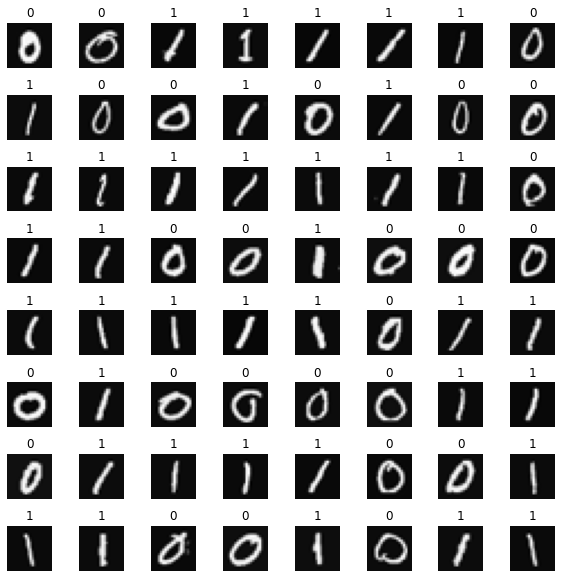

In [106]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index])
    ax.set_axis_off()

<a name="3"></a>
## 3 - Train a Neural network with Tensorflow

In [110]:
from sklearn.model_selection import train_test_split
# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Neural network structure 

In [70]:

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    
        Dense(25, activation='sigmoid', name = 'layer1'),
        Dense(15, activation='sigmoid', name = 'layer2'),
        Dense(1, activation='sigmoid', name = 'output')
    ], name = "ann_model" 
)         

In [111]:
model.summary()

Model: "digit_rec"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 output (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


Further splitting train set to train and validation set (to identify overfitting)

In [92]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [112]:
model.compile(
    loss     = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(0.001),
    
)

model.fit(
    X_train2,y_train2,
    epochs=100,
    validation_data=(X_val, y_val)
)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 1.3296e-07 - val_loss: 1.3143e-07
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 1.3121e-07 - val_loss: 1.2923e-07
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 1.2880e-07 - val_loss: 1.2667e-07
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 1.2609e-07 - val_loss: 1.2386e-07
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 1.2315e-07 - val_loss: 1.2084e-07
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 1.2010e-07 - val_loss: 1.1801e-07
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 1.1744e-07 - val_loss: 1.1537e-07
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 1.1480e-07 - val_loss: 1.1271e-07
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 1.1208e-07 - val_loss: 1.1009e-07
Epoch 10/100
19/19 [================

Both the trainning and valitdation losses keep decreasing no signs of overfitting. Loss values have already reach a low levelquickly means we could get away with less epochs. 

<a name="4"></a>
## 4 - Predict and Visualise

In [115]:
# Predicting the probabilties of each image on the test set to be the digit 1
ypreds = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [116]:
# If the probsability is P(ypred=1|Xtest) >= threshold we say that the image represents the digit 1. Otherwise 0.
threshold = 0.5 
y_pred    = np.zeros(len(ypreds)) 
mask      = ypreds>=threshold     # above a threshold we put 1
y_pred[mask.ravel()] = 1


In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.995

Model learned how to classify the images with 99% accuracy

Visualise the predictions

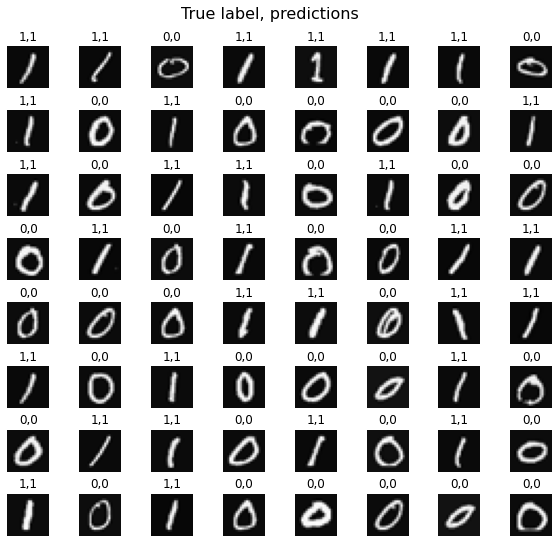

In [121]:
m, n = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,400),verbose=0)
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat}")
    ax.set_axis_off()
fig.suptitle("True label, predictions", fontsize=16)
plt.show()

<sub> Source: The dataset is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/) and this is a project I completed for the course Advanced Learning Algorithms from Deepleaning.ai</sub>
